In [ ]:
#Dimensionality Reduction in Python
## 1. Exploring high dimensional data
## 2. Feature selection I, selecting for feature information
## 3. Feature selection II, selecting for model accuracy
## 4. Feature extraction

## 1. Exploring high dimensional data

In [1]:
# Introduction

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/pokemon.csv'
pokemon_df = pd.read_csv(filename)
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


**Finding the number of dimensions in a dataset**

A larger sample of the Pokemon dataset has been loaded for you as the Pandas dataframe pokemon_df.

How many dimensions, or columns are in this dataset?

**Possible Answers**

- [ ] 5 dimensions
- [x] 7 dimensions
- [ ] 8 dimensions
- [ ] 160 dimensions

That's correct, each Pokemon is described by 7 features.

In [5]:
# Removing features without variance

# Remove the feature without variance from this list
# pokemon_df.describe()
# number_cols = ['HP', 'Attack', 'Defense', 'Generation']
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
# pokemon_df.describe(exclude='number')
# non_number_cols = ['Name', 'Type 1', 'Legendary']
non_number_cols = ['Name', 'Type 1']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name Type 1
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


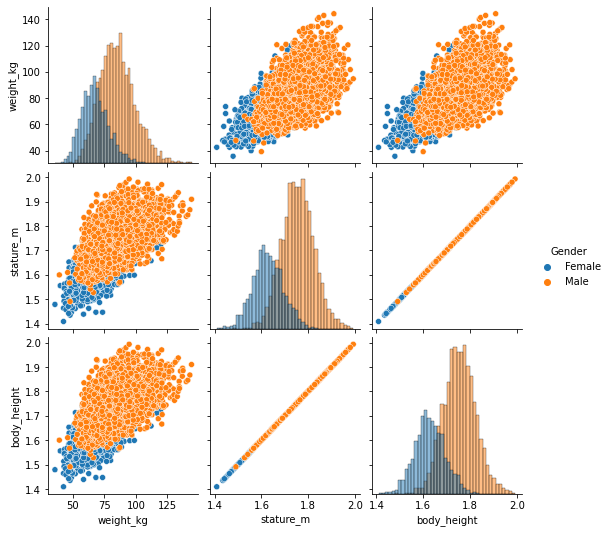

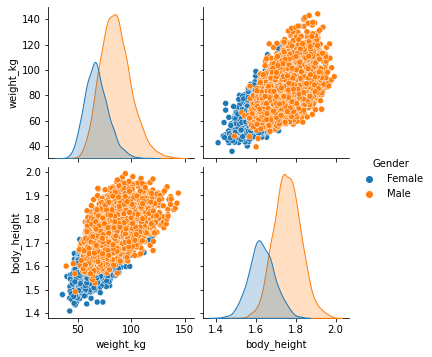

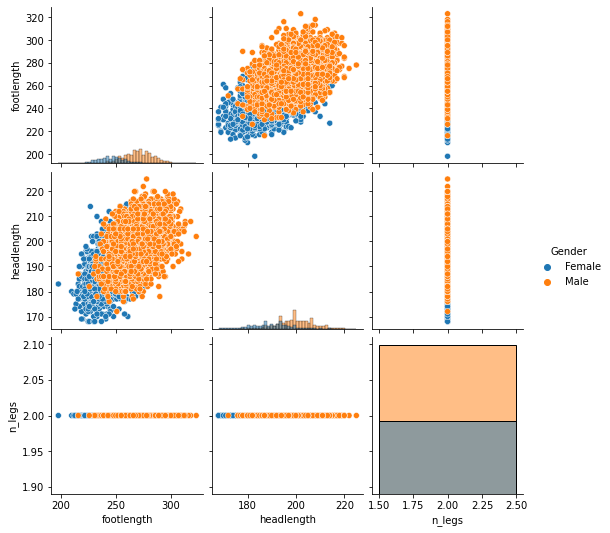

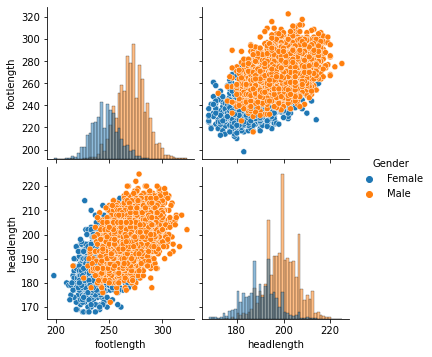

In [9]:
# Feature selection vs feature extraction

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ANSUR_II_FEMALE.csv'
female = pd.read_csv(filename)

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ANSUR_II_MALE.csv'
male = pd.read_csv(filename)

ansur_df = pd.concat([female, male])
ansur_df['body_height'] = ansur_df['stature_m']
ansur_df['n_legs'] = 2
ansur_df_1 = ansur_df[['Gender', 'weight_kg', 'stature_m', 'body_height']]
ansur_df_2 = ansur_df[['Gender', 'footlength', 'headlength', 'n_legs']]

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

**Advantage of feature selection**

What advantage does feature selection have over feature extraction?

**Possible Answers**

- [ ] Feature selection allows you to do a stronger reduction in the number of dimensions.
- [ ] Less information is lost during feature selection compared to feature extraction.
- [x] The selected features remain unchanged, and are therefore easy to interpret.
- [ ] Models will never overfit to a sub-selected dataset.
press

Correct! Extracted features can be quite hard to interpret.

In [ ]:
# t-SNE visualization of high-dimensional data

**t-SNE intuition**

t-SNE is super powerful, but do you know exactly when to use it?

What is a good use case to use t-SNE?

**Possible Answers**

- [ ] When you want to visually check if two groups within your dataset differ significantly.
- [x] When you want to visually explore the patterns in a high dimensional dataset.
- [ ] When you want to know the importance of specific features in a dataset.
- [ ] When you want to sub-select the two most important features present in your dataset.

Correct! That is exactly what t-SNE is great at.

In [13]:
# Fitting t-SNE to the ANSUR data

from sklearn.manifold import TSNE

ansur_df = ansur_df[['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference',
       'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
       'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting',
       'iliocristaleheight', 'interpupillarybreadth', 'interscyei', 'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference', 'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
       'shouldercircumference', 'shoulderelbowlength', 'shoulderlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight',
       'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight']]

# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = ansur_df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


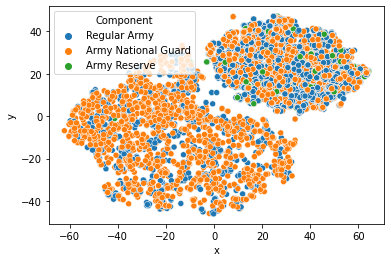

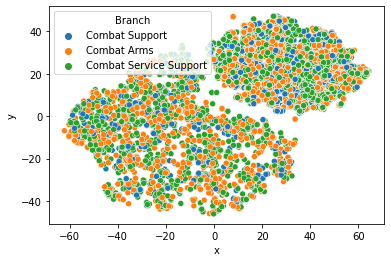

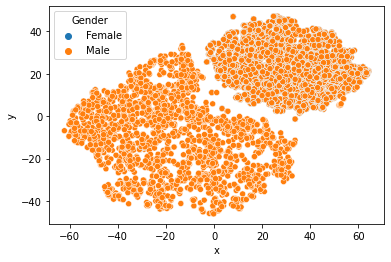

In [14]:
# t-SNE visualisation of dimensionality

tsne = pd.DataFrame(tsne_features, columns = ['x', 'y'])
df = ansur_df.join(tsne)

# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

# Show the plot
plt.show()

# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

# Show the plot
plt.show()

# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

# Show the plot
plt.show()

## 2. Feature selection I, selecting for feature information

In [16]:
# The curse of dimensionality

# Train - test split

ansur_df = ansur_df[['Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight']]

# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis = 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 91 Features.


In [17]:
# Fitting and testing the model

# Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of the Support Vector Classification class
svc = SVC(gamma = 'auto')

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

65.4% accuracy on test set vs. 100.0% on training set


In [18]:
# Accuracy after dimensionality reduction

# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

93.1% accuracy on test set vs. 93.5% on training set


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


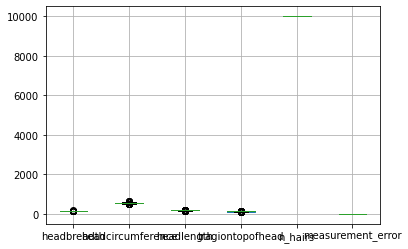

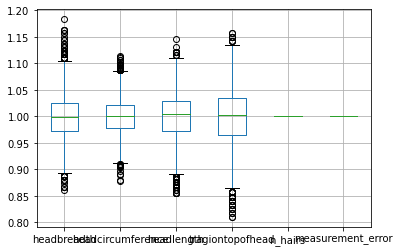

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              0.000000e+00
measurement_error    3.231707e-27
dtype: float64


In [27]:
# Features with missing values or little variance

# Finding a good variance threshold

head_df = ansur_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]
head_df['n_hairs'] = 10000
head_df['measurement_error'] = 0.1

# Create the boxplot
head_df.boxplot()

plt.show()

# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

**Finding a good variance threshold**

You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as head_df.

**Question**

Inspect the printed variances. If you want to remove the 2 very low variance features. What would be a good variance threshold?

**Possible Answers**

- [ ] 1.5e-03
- [ ] 1.5e-02
- [x] 1.0e-03
- [ ] 1.0e-02

You're right! A threshold of 1.0e-03 (0.001) will remove the two low variance features.

In [28]:
# Features with low variance

from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 6 to 4.


**Removing features with many missing values**

You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

**Question**

In what range lies highest ratio of missing values for a single feature in the dataset?

**Possible Answers**

- [x] Between 0.9 and 1.0.
- [ ] Between 0.8 and 0.9.
- [ ] Between 0.7 and 0.8.
- [ ] Between 0.6 and 0.7.

In [29]:
# Removing features with many missing values

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/Public_Schools2.csv'
school_df = pd.read_csv(filename)

# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


In [ ]:
# Pairwise correlation

**Correlation intuition**

What statement on correlations is correct?

**Possible Answers**

- [x] The correlation coefficient of A to B is equal to that of B to A.
- [ ] When two features have a correlation coefficient of 1 the values of both features are equal for each observation.
- [ ] A correlation coefficient of 0 between two features A and B implies that high values of A are typically associated with low values of B.

Correct! This is why you can drop half of the correlation matrix without losing information.

**Inspecting the correlation matrix**

A sample of the ANSUR body measurements dataset has been pre-loaded as ansur_df. Use the terminal to create a correlation matrix for this dataset.

What is the correlation coefficient between wrist and ankle circumference?

**Possible Answers**

- [x] 0.702178
- [ ] 1.000000
- [ ] 0.301963
- [ ] 0.576679

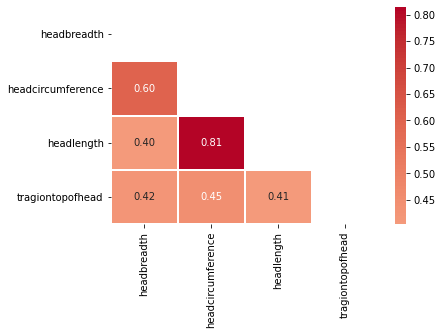

In [35]:
# Visualizing the correlation matrix

df = ansur_df[['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']]

# Create the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

**Visualizing the correlation matrix**

Reading the correlation matrix of ansur_df in its raw, numeric format doesn't allow us to get a quick overview. Let's improve this by removing redundant values and visualizing the matrix using seaborn.

Seaborn has been pre-loaded as sns, matplotlib.pyplot as plt, NumPy as np and pandas as pd.

**Question**

Which two features have the strongest correlation?

![](https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/correlation-matrix.jpg)

**Possible Answers**

- [ ] Wrist circumference and Ankle circumference.
- [ ] Crotch height and Elbow rest height.
- [ ] Wrist circumference and Buttock height.
- [x] Buttock height and Crotch height.

In [36]:
# Removing highly correlated features

# Filtering out highly correlated features

# Calculate the correlation matrix and take the absolute value
corr_matrix = ansur_df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
reduced_df = ansur_df.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 74 columns


   pool_drownings  nuclear_energy
0           421.0           728.3
1           465.0           753.9
2           494.0           768.8
3           538.0           780.1
4           430.0           763.7


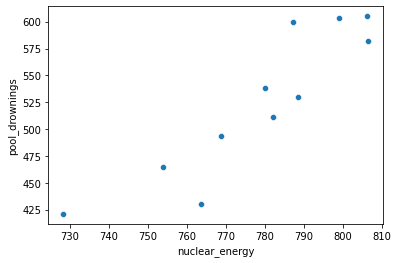

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000


In [39]:
# Nuclear energy and pool drownings

weird_df = pd.DataFrame([[421.0, 728.3], [465.0, 753.9], [494.0, 768.8], [538.0, 780.1], [430.0, 763.7], [530.0, 788.5], [511.0, 782.0], [600.0, 787.2], [582.0, 806.4], [605.0, 806.2], [603.0, 798.9]], columns = ['pool_drownings', 'nuclear_energy'])

# Print the first five lines of weird_df
print(weird_df.head())

# Put nuclear energy production on the x-axis and the number of pool drownings on the y-axis
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

# Print out the correlation matrix of weird_df
print(weird_df.corr())

**Nuclear energy and pool drownings**

The dataset that has been pre-loaded for you as weird_df contains actual data provided by the US Centers for Disease Control & Prevention and Department of Energy.

Let's see if we can find a pattern.

Seaborn has been pre-loaded as sns and matplotlib.pyplot as plt.

**Question**

What can you conclude from the strong correlation (r=0.9) between these features?

**Possible Answers**

- [ ] If the nuclear energy production increases next year I'd better not go swimming.
- [ ] You could bring the nuclear energy production down by increasing pool safety.
- [ ] To build a Uranium usage forecaster, I should use pool drownings or nuclear energy production as features but not both.
- [x] Not much, correlation does not imply causation.

## 3. Feature selection II, selecting for model accuracy

In [40]:
# Selecting features for model performance

# Building a diabetes classifier

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/PimaIndians.csv'
diabetes_df = pd.read_csv(filename)
y = diabetes_df['test']
X = diabetes_df.drop('test', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
lr = LogisticRegression(solver = 'liblinear')

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Fit the logistic regression model on the scaled training data
lr.fit(X_train_std, y_train)

# Scale the test features
X_test_std = scaler.transform(X_test)

# Predict diabetes presence on the scaled test set
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

73.5% accuracy on test set.
{'pregnant': 0.15, 'glucose': 0.88, 'diastolic': 0.01, 'triceps': 0.13, 'insulin': 0.02, 'bmi': 0.49, 'family': 0.61, 'age': 0.53}


In [43]:
# Manual Recursive Feature Elimination

# Remove the feature with the lowest model coefficient
# X = diabetes_df[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]
# X = diabetes_df[['pregnant', 'glucose', 'triceps', 'insulin', 'bmi', 'family', 'age']]
# X = diabetes_df[['glucose', 'triceps', 'bmi', 'family', 'age']]
X = diabetes_df[['glucose']]

# Performs a 25-75% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scales features and fits the logistic regression model
lr.fit(scaler.fit_transform(X_train), y_train)

# Calculates the accuracy on the test set and prints coefficients
acc = accuracy_score(y_test, lr.predict(scaler.transform(X_test)))
print("{0:.1%} accuracy on test set.".format(acc)) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

76.5% accuracy on test set.
{'glucose': 1.27}


In [48]:
# Automatic Recursive Feature Elimination

from sklearn.feature_selection import RFE

X = diabetes_df[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create the RFE with a LogisticRegression estimator and 3 features to select
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)

# Fit the eliminator to the data
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print(dict(zip(X.columns, rfe.ranking_)))

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
{'pregnant': 4, 'glucose': 2, 'diastolic': 6, 'triceps': 3, 'insulin': 5, 'bmi': 1, 'family': 1, 'age': 1}
Index(['bmi', 'family', 'age'], dtype='object')
72.4% accuracy on test set.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [50]:
# Tree-based feature selection

# Building a random forest model

from sklearn.ensemble import RandomForestClassifier
X = diabetes_df[['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'family', 'age']]

# Perform a 75% training and 25% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the random forest model to the training data
rf = RandomForestClassifier(random_state=0, n_estimators = 10)
rf.fit(X_train, y_train)

# Calculate the accuracy
acc = accuracy_score(y_test, rf.predict(X_test))

# Print the importances per feature
print(dict(zip(X.columns, rf.feature_importances_.round(2))))

# Print accuracy
print("{0:.1%} accuracy on test set.".format(acc))

{'pregnant': 0.09, 'glucose': 0.21, 'diastolic': 0.08, 'triceps': 0.11, 'insulin': 0.13, 'bmi': 0.09, 'family': 0.12, 'age': 0.16}
77.6% accuracy on test set.


In [51]:
# Random forest for feature selection

# Create a mask for features importances above the threshold
mask = rf.feature_importances_ > 0.15

# Apply the mask to the feature dataset X
reduced_X = X.loc[:, mask]

# prints out the selected column names
print(reduced_X.columns)

Index(['glucose', 'age'], dtype='object')


In [52]:
# Recursive Feature Elimination with random forests

# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestClassifier(n_estimators = 10), n_features_to_select=2, step = 2, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)

# Create a mask
mask = rfe.support_

# Apply the mask to the feature dataset X and print the result
reduced_X = X.loc[:, mask]
print(reduced_X.columns)

Fitting estimator with 8 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Index(['glucose', 'insulin'], dtype='object')


In [55]:
# Regularized linear regression

# Creating a LASSO regressor

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ANSUR_II_FEMALE.csv'
female = pd.read_csv(filename)

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/ANSUR_II_MALE.csv'
male = pd.read_csv(filename) 
ansur_df = pd.concat([female, male])

X = ansur_df[['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight']]
y = ansur_df['BMI']

from sklearn.linear_model import Lasso

# Set the test size to 30% to get a 70-30% train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit the scaler on the training features and transform these in one go
X_train_std = scaler.fit_transform(X_train)

# Create the Lasso model
la = Lasso()

# Fit it to the standardized training data
la.fit(X_train_std, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
# Lasso model results

# Transform the test set with the pre-fitted scaler
X_test_std = scaler.transform(X_test)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(X_test_std, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict 83.9% of the variance in the test set.
The model has ignored 81 out of 91 features.


In [57]:
# Adjusting the regularization strength

# Find the highest alpha value with R-squared above 98%
la = Lasso(alpha=0.1, random_state=0)

# Fits the model and calculates performance stats
la.fit(X_train_std, y_train)
r_squared = la.score(X_test_std, y_test)
n_ignored_features = sum(la.coef_ == 0)

# Print peformance stats 
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))
print("{} out of {} features were ignored.".format(n_ignored_features, len(la.coef_)))

The model can predict 98.0% of the variance in the test set.
68 out of 91 features were ignored.


In [58]:
# Combining feature selectors

# Creating a LassoCV regressor

X = ansur_df[ansur_df.Gender == 'Male'][['acromialheight', 'axillaheight', 'bideltoidbreadth', 'buttockcircumference', 'buttockkneelength', 'buttockpopliteallength', 'cervicaleheight', 'chestcircumference', 'chestheight',
       'earprotrusion', 'footbreadthhorizontal', 'forearmcircumferenceflexed', 'handlength', 'headbreadth', 'heelbreadth', 'hipbreadth', 'iliocristaleheight', 'interscyeii',
       'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'neckcircumferencebase', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'sleeveoutseam',
       'thighcircumference', 'thighclearance', 'verticaltrunkcircumferenceusa', 'waistcircumference', 'waistdepth', 'wristheight', 'BMI']]
y = ansur_df[ansur_df.Gender == 'Male']['bicepscircumferenceflexed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LassoCV

# Create and fit the LassoCV model on the training set
lcv = LassoCV()
lcv.fit(X_train, y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test, y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 2.626
The model explains 84.9% of the test set variance
19 features out of 32 selected


In [60]:
# Ensemble models for extra votes

from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.get_support()

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 83.3% of the variance in the test set


In [61]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=1)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_

Fitting estimator with 32 features.
Fitting estimator with 29 features.
Fitting estimator with 26 features.
Fitting estimator with 23 features.
Fitting estimator with 20 features.
Fitting estimator with 17 features.
Fitting estimator with 14 features.
Fitting estimator with 11 features.
The model can explain 82.6% of the variance in the test set


In [64]:
# Combining 3 feature selectors

from sklearn.linear_model.base import LinearRegression
lm = LinearRegression()

# Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3

# Apply the dimensionality reduction on X
X_reduced = X.loc[:, meta_mask]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 83.2% of the variance in the test set using 7 features.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


## 4. Feature extraction

In [121]:
# Feature extraction

# Manual feature extraction I

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/grocery_sales.csv'
sales_df = pd.read_csv(filename)

# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(['revenue', 'quantity'], axis=1)

print(reduced_df.head())

  storeID  product     price
0       A   Apples  5.135616
1       A  Bananas  3.365105
2       A  Oranges  5.317020
3       B   Apples  5.143417
4       B  Bananas  3.898517


In [122]:
# Manual feature extraction II

data = {'height_1': {0: 1.78,
  1: 1.7,
  2: 1.74,
  3: 1.66,
  4: 1.91,
  5: 1.72,
  6: 1.81,
  7: 1.85,
  8: 1.78,
  9: 1.81,
  10: 1.78,
  11: 1.73,
  12: 1.81,
  13: 1.86,
  14: 1.71,
  15: 1.74,
  16: 1.69,
  17: 1.77,
  18: 1.75,
  19: 1.79,
  20: 1.78,
  21: 1.68,
  22: 1.65,
  23: 1.96,
  24: 1.76,
  25: 1.63,
  26: 1.82,
  27: 1.8,
  28: 1.74,
  29: 1.82,
  30: 1.88,
  31: 1.76,
  32: 1.68,
  33: 1.85,
  34: 1.78,
  35: 1.79,
  36: 1.68,
  37: 1.85,
  38: 1.74,
  39: 1.74,
  40: 1.74,
  41: 1.68,
  42: 1.84,
  43: 1.73,
  44: 1.76,
  45: 1.67,
  46: 1.74,
  47: 1.71,
  48: 1.88,
  49: 1.67,
  50: 1.78,
  51: 1.84,
  52: 1.64,
  53: 1.75,
  54: 1.7,
  55: 1.84,
  56: 1.78,
  57: 1.75,
  58: 1.7,
  59: 1.85,
  60: 1.61,
  61: 1.71,
  62: 1.84,
  63: 1.68,
  64: 1.74,
  65: 1.7,
  66: 1.67,
  67: 1.85,
  68: 1.75,
  69: 1.62,
  70: 1.77,
  71: 1.7,
  72: 1.62,
  73: 1.73,
  74: 1.84,
  75: 1.74,
  76: 1.67,
  77: 1.75,
  78: 1.82,
  79: 1.8,
  80: 1.75,
  81: 1.72,
  82: 1.81,
  83: 1.79,
  84: 1.72,
  85: 1.58,
  86: 1.72,
  87: 1.8,
  88: 1.74,
  89: 1.7,
  90: 1.74,
  91: 1.73,
  92: 1.78,
  93: 1.82,
  94: 1.84,
  95: 1.79,
  96: 1.66,
  97: 1.7,
  98: 1.79,
  99: 1.76},
 'height_2': {0: 1.8,
  1: 1.7,
  2: 1.75,
  3: 1.68,
  4: 1.93,
  5: 1.71,
  6: 1.82,
  7: 1.85,
  8: 1.78,
  9: 1.81,
  10: 1.78,
  11: 1.74,
  12: 1.82,
  13: 1.86,
  14: 1.71,
  15: 1.74,
  16: 1.7,
  17: 1.77,
  18: 1.75,
  19: 1.78,
  20: 1.75,
  21: 1.69,
  22: 1.66,
  23: 1.95,
  24: 1.78,
  25: 1.62,
  26: 1.82,
  27: 1.8,
  28: 1.76,
  29: 1.83,
  30: 1.88,
  31: 1.76,
  32: 1.67,
  33: 1.83,
  34: 1.78,
  35: 1.79,
  36: 1.69,
  37: 1.86,
  38: 1.74,
  39: 1.74,
  40: 1.73,
  41: 1.67,
  42: 1.82,
  43: 1.75,
  44: 1.75,
  45: 1.67,
  46: 1.73,
  47: 1.72,
  48: 1.86,
  49: 1.67,
  50: 1.77,
  51: 1.84,
  52: 1.63,
  53: 1.74,
  54: 1.7,
  55: 1.84,
  56: 1.78,
  57: 1.75,
  58: 1.69,
  59: 1.85,
  60: 1.6,
  61: 1.71,
  62: 1.83,
  63: 1.66,
  64: 1.74,
  65: 1.7,
  66: 1.65,
  67: 1.85,
  68: 1.74,
  69: 1.62,
  70: 1.78,
  71: 1.7,
  72: 1.63,
  73: 1.72,
  74: 1.84,
  75: 1.73,
  76: 1.66,
  77: 1.74,
  78: 1.82,
  79: 1.8,
  80: 1.74,
  81: 1.73,
  82: 1.81,
  83: 1.77,
  84: 1.73,
  85: 1.6,
  86: 1.73,
  87: 1.8,
  88: 1.73,
  89: 1.71,
  90: 1.74,
  91: 1.74,
  92: 1.78,
  93: 1.83,
  94: 1.84,
  95: 1.8,
  96: 1.66,
  97: 1.72,
  98: 1.79,
  99: 1.76},
 'height_3': {0: 1.8,
  1: 1.69,
  2: 1.73,
  3: 1.67,
  4: 1.9,
  5: 1.74,
  6: 1.81,
  7: 1.84,
  8: 1.8,
  9: 1.82,
  10: 1.8,
  11: 1.74,
  12: 1.8,
  13: 1.88,
  14: 1.71,
  15: 1.75,
  16: 1.7,
  17: 1.77,
  18: 1.76,
  19: 1.8,
  20: 1.78,
  21: 1.67,
  22: 1.65,
  23: 1.97,
  24: 1.75,
  25: 1.63,
  26: 1.82,
  27: 1.82,
  28: 1.75,
  29: 1.82,
  30: 1.87,
  31: 1.77,
  32: 1.67,
  33: 1.85,
  34: 1.77,
  35: 1.8,
  36: 1.69,
  37: 1.85,
  38: 1.74,
  39: 1.73,
  40: 1.73,
  41: 1.68,
  42: 1.84,
  43: 1.74,
  44: 1.78,
  45: 1.68,
  46: 1.73,
  47: 1.72,
  48: 1.87,
  49: 1.67,
  50: 1.78,
  51: 1.86,
  52: 1.63,
  53: 1.74,
  54: 1.7,
  55: 1.83,
  56: 1.79,
  57: 1.74,
  58: 1.69,
  59: 1.85,
  60: 1.61,
  61: 1.73,
  62: 1.85,
  63: 1.68,
  64: 1.73,
  65: 1.71,
  66: 1.66,
  67: 1.83,
  68: 1.76,
  69: 1.62,
  70: 1.78,
  71: 1.7,
  72: 1.63,
  73: 1.72,
  74: 1.83,
  75: 1.75,
  76: 1.66,
  77: 1.74,
  78: 1.82,
  79: 1.8,
  80: 1.75,
  81: 1.71,
  82: 1.8,
  83: 1.77,
  84: 1.73,
  85: 1.56,
  86: 1.71,
  87: 1.8,
  88: 1.73,
  89: 1.72,
  90: 1.73,
  91: 1.73,
  92: 1.78,
  93: 1.81,
  94: 1.85,
  95: 1.79,
  96: 1.67,
  97: 1.71,
  98: 1.81,
  99: 1.77},
 'weight_kg': {0: 81.5,
  1: 72.6,
  2: 92.9,
  3: 79.4,
  4: 94.6,
  5: 80.2,
  6: 116.2,
  7: 95.4,
  8: 99.5,
  9: 70.2,
  10: 88.2,
  11: 70.1,
  12: 103.7,
  13: 111.6,
  14: 89.6,
  15: 92.4,
  16: 77.9,
  17: 96.9,
  18: 76.0,
  19: 90.8,
  20: 71.4,
  21: 74.6,
  22: 79.2,
  23: 91.5,
  24: 96.5,
  25: 67.5,
  26: 107.3,
  27: 79.3,
  28: 78.2,
  29: 88.2,
  30: 71.5,
  31: 94.7,
  32: 66.5,
  33: 87.9,
  34: 67.5,
  35: 88.4,
  36: 69.5,
  37: 121.8,
  38: 71.9,
  39: 88.1,
  40: 57.5,
  41: 87.6,
  42: 85.0,
  43: 86.5,
  44: 95.8,
  45: 66.7,
  46: 70.6,
  47: 84.7,
  48: 101.3,
  49: 85.6,
  50: 109.5,
  51: 83.4,
  52: 72.7,
  53: 98.6,
  54: 77.3,
  55: 140.0,
  56: 67.4,
  57: 88.4,
  58: 98.8,
  59: 95.2,
  60: 56.6,
  61: 71.7,
  62: 71.7,
  63: 80.2,
  64: 98.8,
  65: 66.2,
  66: 80.7,
  67: 105.3,
  68: 68.3,
  69: 74.9,
  70: 73.8,
  71: 60.4,
  72: 77.4,
  73: 76.8,
  74: 102.2,
  75: 96.3,
  76: 92.3,
  77: 98.8,
  78: 88.7,
  79: 98.7,
  80: 85.2,
  81: 74.8,
  82: 92.0,
  83: 74.4,
  84: 82.3,
  85: 62.7,
  86: 77.8,
  87: 88.2,
  88: 59.0,
  89: 73.0,
  90: 86.4,
  91: 86.6,
  92: 73.7,
  93: 65.4,
  94: 69.6,
  95: 77.5,
  96: 72.7,
  97: 79.7,
  98: 74.4,
  99: 96.8}}

height_df = pd.DataFrame.from_dict(data)

# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(['height_1', 'height_2', 'height_3'], axis=1)

print(reduced_df.head())

   weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


**Principal component intuition**

![](https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/lower_vs_upper_arm_vectors_small.png)

After standardizing the lower and upper arm lengths from the ANSUR dataset we've added two perpendicular vectors that are aligned with the main directions of variance. We can describe each point in the dataset as a combination of these two vectors multiplied with a value each. These values are then called principal components.

Which of the following statements is true?

**Possible Answers**

- [x] People with a negative component for the yellow vector have long forearms relative to their upper arms.
- [ ] People with a positive component for the yellow vector have long forearms relative to their upper arms.
- [ ] People with a negative component for the red vector have above average arm lengths.
- [ ] People with a positive component for the red vector have below average arm lengths.
press


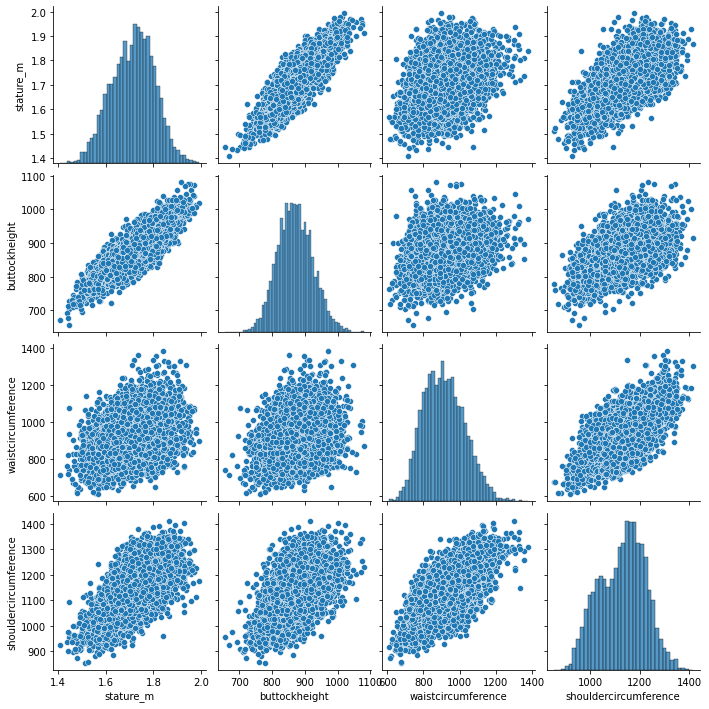

In [123]:
# Principal component analysis

# Calculating Principal Components

ansur_df_1 = ansur_df[['stature_m', 'buttockheight', 'waistcircumference', 'shouldercircumference']]

# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df_1)

plt.show()

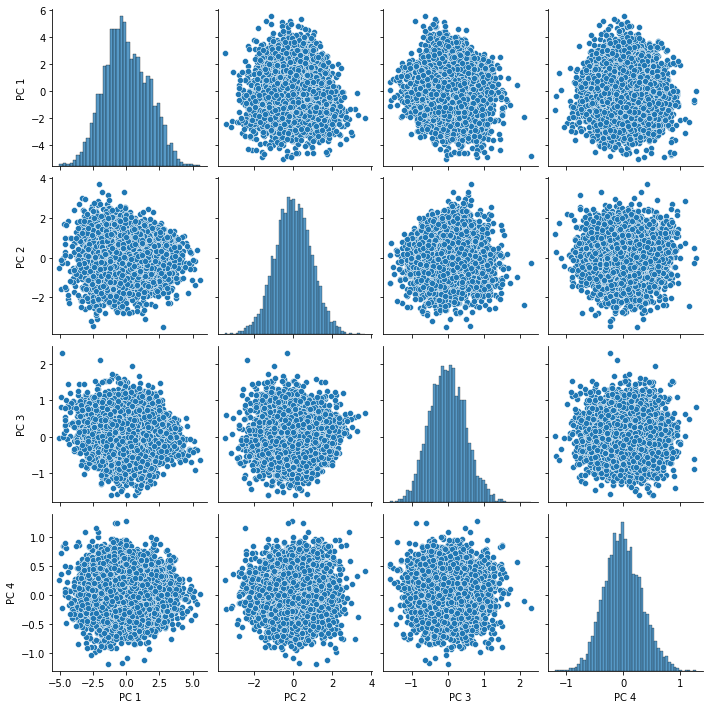

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df_1)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)

# This changes the numpy array output back to a dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component dataframe
sns.pairplot(pc_df)
plt.show()

In [125]:
# PCA on a larger dataset

ansur_df_2 = ansur_df[['stature_m', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
       'cervicaleheight', 'sittingheight']]

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df_2)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [126]:
# PCA explained variance

# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[6.96695776e-01 1.65318195e-01 4.41759304e-02 3.10140882e-02
 1.96244729e-02 1.05810800e-02 1.00183486e-02 7.58854596e-03
 5.29894105e-03 4.64328943e-03 2.69987761e-03 1.87568473e-03
 4.65770148e-04]
[0.69669578 0.86201397 0.9061899  0.93720399 0.95682846 0.96740954
 0.97742789 0.98501644 0.99031538 0.99495867 0.99765855 0.99953423
 1.        ]


**PCA explained variance**

You'll be inspecting the variance explained by the different principal components of the pca instance you created in the previous exercise.

**Question**

How much of the variance is explained by the 4th principal component?

**Possible Answers**

- [ ] About 3.03%
- [x] About 3.77%
- [ ] About 6.8%
- [ ] About 61.45%

**PCA explained variance**

You'll be inspecting the variance explained by the different principal components of the pca instance you created in the previous exercise.

**Question**

What's the lowest number of principal components you should keep if you don't want to lose more than 10% of explained variance during dimensionality reduction?

**Possible Answers**

- [ ] 2 principal components
- [ ] 3 principal components
- [x] 4 principal components
- [ ] 5 principal components


In [127]:
# PCA applications

# Understanding the components

poke_df = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

from sklearn.pipeline import Pipeline

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'HP': 0.39, 'Attack': 0.44, 'Defense': 0.36, 'Sp. Atk': 0.46, 'Sp. Def': 0.45, 'Speed': 0.34}
PC 2 effects = {'HP': 0.08, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.31, 'Sp. Def': 0.24, 'Speed': -0.67}


**Understanding the components**

You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

**Question**

Inspect the PC 1 effects. Which statement is true?

**Possible Answers**

- [ ] Sp. Atk has the biggest effect on this feature by far. PC 1 can be interpreted as a measure of how good a Pokemon's special attack is.
- [x] All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality (high stats).

**Understanding the components**

You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

**Question**

Inspect the PC 2 effects. Which statement is true?

**Possible Answers**

- [x] Defense has a strong positive effect on the second component and speed a strong negative one. This component quantifies an agility vs. armor & protection trade-off.
- [ ] Fast Pokemon have high values for this component.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


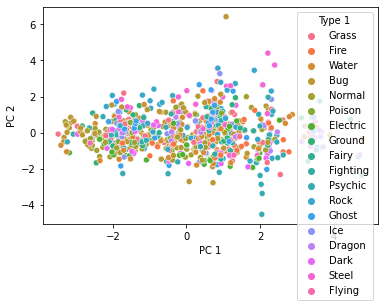

In [128]:
# PCA for feature exploration

poke_cat_df = pokemon_df[['Type 1', 'Legendary']]

pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


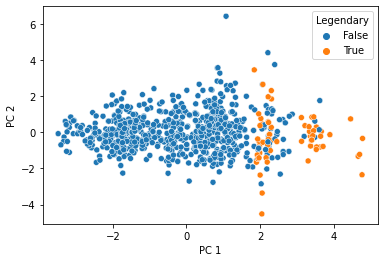

In [129]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

In [130]:
# PCA in a model pipeline

X = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon_df['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.45673596 0.18599109 0.12852181]
93.8% test set accuracy


In [131]:
# Principal Component selection

# Selecting the proportion of variance to keep

ansur_df_3 = ansur_df[['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference',
       'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal',
       'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength',
       'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting', 'iliocristaleheight', 'interpupillarybreadth', 'interscyei',
       'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight', 'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference',
       'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength', 'shouldercircumference', 'shoulderelbowlength', 'shoulderlength',
       'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight', 'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight',
       'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth', 'waistcircumference', 'waistdepth', 'waistfrontlengthsitting',
       'waistheightomphalion', 'wristcircumference', 'wristheight', 'weight_kg', 'stature_m', 'BMI']]

# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df_3)

print('{} components selected'.format(len(pipe.steps[1][1].components_)))

17 components selected


**Selecting the proportion of variance to keep**

You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

You'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded too (Pipeline(), StandardScaler(), PCA()).

**Question**

How many additional features do you need to explain 90% instead of 80% of the variance?

**Possible Answers**

- [ ] 11
- [x] 12
- [ ] 23

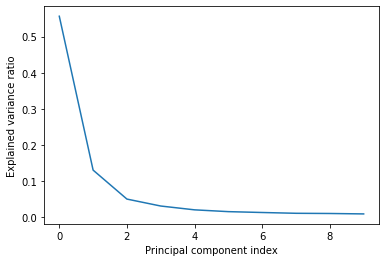

In [132]:
# Choosing the number of components

ansur_df_4 = ansur_df.drop(['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class'], axis=1)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df_4)

# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

**Choosing the number of components**

You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

**Question**

To how many components can you reduce the dataset without compromising too much on explained variance? Note that the x-axis is zero indexed.

**Possible Answers**

- [ ] 1
- [ ] 2
- [x] 3
- [ ] 4

In [133]:
# PCA for image compression

def plot_digits(data):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary',
                  clim=(0, 300))
    plt.show()

KeyError: ignored

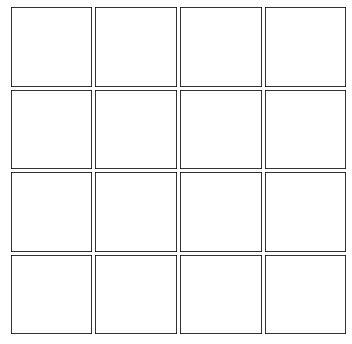

In [134]:
# Plot the MNIST sample data
plot_digits(X_test)

# Transform the input data to principal components
pc = pipe.transform(X_test)

# Prints the number of features per dataset
print("X_test has {} features".format(X_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("X_rebuilt has {} features".format(X_rebuilt.shape[1]))

# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)